# FE621 - Homework #5

**Author**: Sid Bhatia

**Date**: May 10th, 2024

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Sveinn Olafsson

**TA**: Dong Woo Kim

## Problem 1 (Portfolio Wealth Growth)

### 1.1 Portfolio Wealth Growth Theory

This section delves into the theoretical mathematical foundation governing the growth of portfolio wealth over time. The analysis is crucial for understanding how investments evolve under the influence of various market factors, including returns and volatility.

#### 1.1.1 Mathematical Formulation

The wealth process $\{V_t\}_{t \geq 0}$ is modeled as a geometric Brownian motion (GBM), which is frequently used to represent stock prices and, by extension, portfolio values under stochastic environments. The stochastic differential equation (SDE) governing this process is given by:

$$
\frac{d V_t}{V_t} = \mu dt + \sigma dW_t \tag{1}
$$
Portfolio Wealth Growth Simulation vs. Expectation
Here:
- $V_t$ represents the portfolio value at time $t$.
- $\mu$ is the expected return of the portfolio, expressed as a percentage of the portfolio value.
- $\sigma$ is the volatility of the portfolio, which measures the standard deviation of the portfolio's returns.
- $dW_t$ is the increment of a standard Brownian motion, which captures the random fluctuations in the market.

##### Interpretation

Equation (1) can be interpreted as follows:
- The term $\mu dt$ captures the expected growth of the portfolio due to returns over an infinitesimally small time interval $dt$.
- The term $\sigma dW_t$ introduces randomness into the growth process, reflecting the uncertainty and risk inherent in the financial markets.

##### Solution to the Differential Equation

The solution to the stochastic differential equation (SDE) given in equation (1) can be expressed explicitly by integrating both sides over the interval from $0$ to $t$:

$$
\ln \frac{V_t}{V_0} = \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t \tag{2}
$$

where:
- $V_0$ is the initial value of the portfolio at time $t=0$.
- $W_t$ represents the standard Brownian motion at time $t$.

From equation (2), we can exponentiate both sides to obtain the explicit form of $V_t$:

$$
V_t = V_0 \exp{\left( (\mu - \frac{\sigma^2}{2})t + \sigma W_t \right)} \tag{3}
$$

##### Mathematical Synthesis

Equation (3) clearly shows how the portfolio value $V_t$ evolves over time. It indicates that the portfolio value is log-normally distributed with its mean and variance increasing over time. This formulation is fundamental in finance for modeling asset prices and helps in understanding the dynamic nature of investment growth under uncertainty.

#### 1.1.2 Expectation of Portfolio Wealth

The following section explores and delves into the expectation (first raw moment/arithmetic average) of the portfolio wealth process.

##### Expectation Calculation

Given the wealth process $V_t$ which follows a geometric Brownian motion (GBM) as described by:

$$
\frac{dV_t}{V_t} = \mu dt + \sigma dW_t \tag{1}
$$

The solution to this stochastic differential equation (SDE) indicates:

$$
V_t = V_0 \exp{\left( (\mu - \frac{\sigma^2}{2})t + \sigma W_t \right)} \tag{3}
$$

To find the expectation $\mathbb{E}[V_t]$, we note that $W_t$ is a standard Brownian motion (BM), which implies $\sigma W_t$ is normally distributed with mean $0$ and variance $\sigma^2 t$. Thus, $\sigma W_t \sim N(0, \sigma^2 t)$, and $e^{\sigma W_t}$ follows a log-normal distribution.

We can use the moment-generating function (MGF) of a normally distributed random variable to compute the expectation of a log-normal variable. For a random variable $X \sim \mathcal{N}(\mu_X, \sigma_X^2)$, the MGF of $X$ at $s$ is $M_X(s) = e^{\mu_X s + \frac{1}{2} \sigma_X^2 s^2}$. Setting $s = 1$, we find:

$$
\mathbb{E}[e^X] = e^{\mu_X + \frac{1}{2} \sigma_X^2} \tag{4}
$$

Applying this to our case, where $\mu_X = 0$ and $\sigma_X^2 = \sigma^2 t$, we get:

$$
\mathbb{E}[e^{\sigma W_t}] = e^{0 + \frac{1}{2} \sigma^2 t} = e^{\frac{1}{2} \sigma^2 t} \tag{5}
$$

Now, substituting this into the solution for $V_t$:

$$
\mathbb{E}[V_t] = \mathbb{E}\left[V_0 \exp\left((\mu - \frac{\sigma^2}{2}) t + \sigma W_t\right)\right]
$$

$$
= V_0 \exp \left( (\mu - \frac{\sigma^2}{2}) t \right) \mathbb{E}[e^{\sigma W_t}] \tag{6}
$$

Substituting the expectation of $e^{\sigma W_t}$:

$$
\mathbb{E}[V_t] = V_0 \exp \left( (\mu - \frac{\sigma^2}{2})t \right) \exp \left(\frac{1}{2} \sigma^2 t \right)
$$

$$
= V_0 \exp (\mu t) \tag{7}
$$

Thus, the expected wealth at time \(t\) is indeed given by:

$$
\mathbb{E}[V_t] = V_0 \exp(\mu t) \tag{7}
$$

This demonstrates that the expectation grows exponentially at a rate determined by the drift $\mu$, independent of the volatility $\sigma$.

### 1.2 Portfolio Wealth Growth Implementation

The following section implements applications of factors governing the growth of portfolio wealth over time in Python.

#### 1.2.1 True vs. Expected Path Simulation

This Python code snippet simulates $50$ paths of a portfolio's wealth process $\{V_t\}_{t \in [0, T]}$ modeled as a geometric Brownian motion (GBM) alongside the expected (arithmetic average) path $\{\mathbb{E}[V_t]\}_{t \in [0, T]}$. We use the parameters $\mu = 0.08$, $\sigma = 0.2$, $T = 30$ years, and an initial portfolio value $V_0 = 100$.

##### Code Breakdown

1. **Import Libraries**:
   - `numpy` for numerical operations.
   - `matplotlib.pyplot` for plotting the results.

```python
import numpy as np
import matplotlib.pyplot as plt
```

<br>

2. **Set Parameters**:
   - `mu` : the expected return rate of the portfolio.
   - `sigma` : the volatility or standard deviation of returns.
   - `T` : the total time horizon for the simulation (30 years).
   - `dt` : the time increment for each step in the simulation.
   - `V0` : the initial portfolio value.
   - `N` : the number of time steps calculated as the total time divided by the increment.
   - `num_paths` : the number of simulation paths.

```python
mu = 0.08       # drift coefficient
sigma = 0.2     # volatility coefficient
T = 30          # time horizon
dt = 0.01       # time increment
V0 = 100        # initial wealth
N = int(T/dt)   # number of time steps
num_paths = 50  # number of paths to simulate
```

<br>

3. **Simulate Paths**:
   - Generate multiple paths of the GBM using random normal distributions to simulate daily returns.
   - Calculate the portfolio value over time for each path based on the GBM formula.

```python
np.random.seed(42)  # for reproducibility
paths = np.zeros((num_paths, N))
for i in range(num_paths):
    dB = np.sqrt(dt) * np.random.normal(size=N-1)
    W = np.cumsum(dB)
    W = np.insert(W, 0, 0)  # insert the initial condition W_0 = 0
    paths[i] = V0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
```

<br>

4. **Calculate Expected Path**:
   - Compute the expected path using the deterministic part of the GBM formula.

```python
expected_path = V0 * np.exp(mu * t)
```

<br>

5. **Plot the Results**:
   - Plot all simulated paths and the expected path to visualize the potential variance around the expected growth.

```python
plt.figure(figsize=(12, 8))
for path in paths:
    plt.plot(t, path, 'r', linewidth=0.5, alpha=0.5)  # red lines for simulated paths
plt.plot(t, expected_path, 'b', linewidth=2.5, label='Expected Path $\mathbb{E}[V_t]$')  # blue line for the expected path
plt.title('Simulation of Portfolio Wealth Growth and Expected Path')
plt.xlabel('Time (years)')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()
```

<img src="file:///C:/Users/sbhatia2/My%20Drive/University/Academics/Semester%20VI/FE621%20-%20Computational%20Methods%20in%20Finance/FE621%20-%20Homework/FE621%20-%20Homework%20%235/fe621-hw5-figs/fe621-hw5-fig1-pwg-sim-exp.png" alt="Portfolio Wealth Growth Simulation vs. Expectation" style="width:100%; max-width:800px;"/>

<figcaption style="text-align: center;"><i>Figure 1 - Portfolio Wealth Growth Simulation vs. Expectation</i></figcaption>

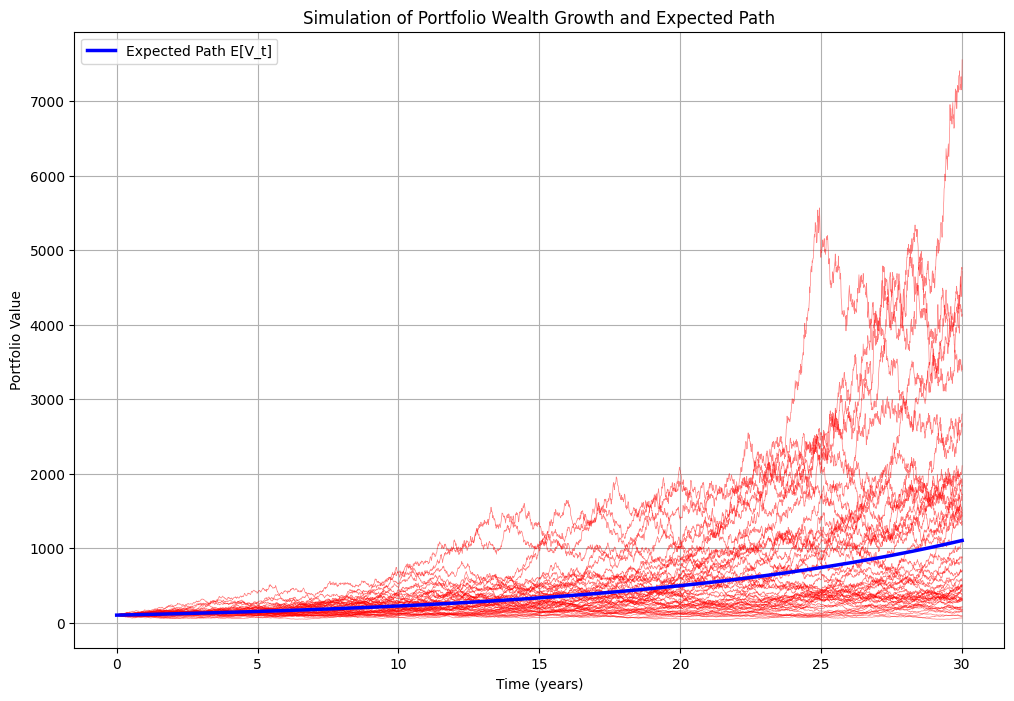

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
mu = 0.08       # drift coefficient
sigma = 0.2     # volatility coefficient
T = 30          # time horizon
dt = 0.01       # time increment
V0 = 100        # initial wealth
N = int(T/dt)   # number of time steps
num_paths = 50  # number of paths to simulate

# Time vector
t = np.linspace(0, T, N)

# Simulate num_paths of the GBM
np.random.seed(42)  # for reproducibility
paths = np.zeros((num_paths, N))
for i in range(num_paths):
    # Generate a Brownian motion path
    dB = np.sqrt(dt) * np.random.normal(size=N-1)
    W = np.cumsum(dB)
    W = np.insert(W, 0, 0)  # insert the initial condition W_0 = 0
    paths[i] = V0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# Calculate the expected path
expected_path = V0 * np.exp(mu * t)

# Plotting the results
plt.figure(figsize=(12, 8))
for path in paths:
    plt.plot(t, path, 'r', linewidth=0.5, alpha=0.5)  # red lines for simulated paths
plt.plot(t, expected_path, 'b', linewidth=2.5, label='Expected Path E[V_t]')  # blue line for the expected path
plt.title('Simulation of Portfolio Wealth Growth and Expected Path')
plt.xlabel('Time (years)')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()